<a href="https://colab.research.google.com/github/LongoAndrea/NoiseReduction/blob/master/Copia_di_Cancellazione_del_rumore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%load_ext autoreload
%autoreload 2
#%env CUDA_VISIBLE_DEVICES=3

Librerie necessarie:


In [2]:
colab_requirements = [
    "pip install tensorflow-gpu==2.0.0-beta0",
    "pip install librosa",
    "pip install noisereduce",
    "pip install soundfile",

]
import sys, subprocess

def run_subprocess_command(cmd):
    # run the command
    process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)
    # print the output
    for line in process.stdout:
        print(line.decode().strip())

IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    for i in colab_requirements:
        run_subprocess_command(i)

Created wheel for noisereduce: filename=noisereduce-1.1.0-cp36-none-any.whl size=7608 sha256=d4573f7c59848ec7a18cb6cf89e513900cdb17fa6dcfee2372957f38bf74518b
Stored in directory: /root/.cache/pip/wheels/a6/2c/70/f9ccb41280dcfbe3eaeb7930f913dd85394617f3d3136f29cc
Successfully built noisereduce


In [3]:
import IPython
from scipy.io import wavfile
import noisereduce as nr
import soundfile as sf
from noisereduce.generate_noise import band_limited_noise
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import io
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/noisereduce/noisereduce.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [0]:
url = "https://raw.githubusercontent.com/timsainb/noisereduce/master/assets/fish.wav"
response = urllib.request.urlopen(url)
data, rate = sf.read(io.BytesIO(response.read()))
data = data

In [8]:
IPython.display.Audio(data=data, rate=rate)

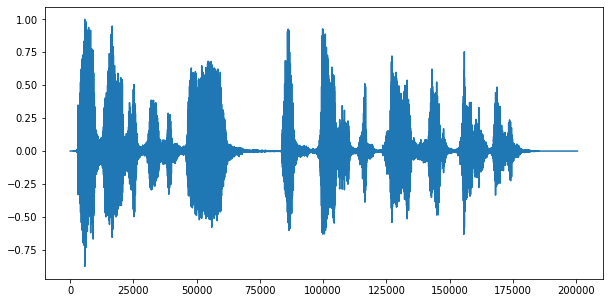

In [9]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data)

In [13]:
#noise_len = 2 # seconds
#noise = band_limited_noise(min_freq=2000, max_freq = 12000, samples=len(data), samplerate=rate)*30
#noise_clip = noise[:rate*noise_len]
url = "https://raw.githubusercontent.com/LongoAndrea/NoiseReduction/master/assets/Lavastoviglie.wav"
response = urllib.request.urlopen(url)
noise, rate = sf.read(io.BytesIO(response.read()))
noise = noise
audio_clip_band_limited = data+noise

RuntimeError: ignored

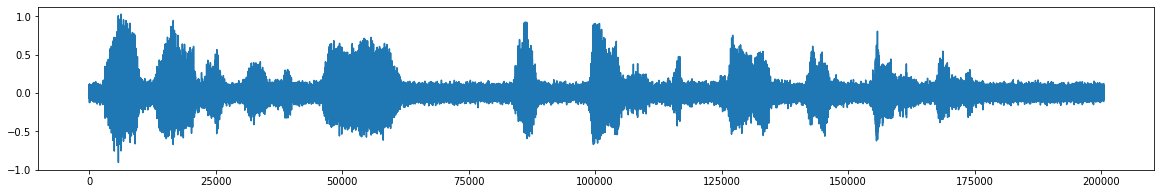

In [0]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(audio_clip_band_limited)

In [0]:
IPython.display.Audio(data=audio_clip_band_limited, rate=rate)

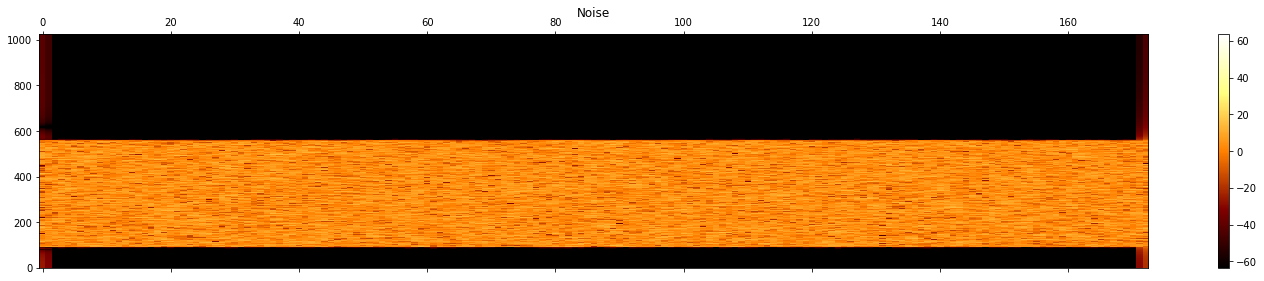

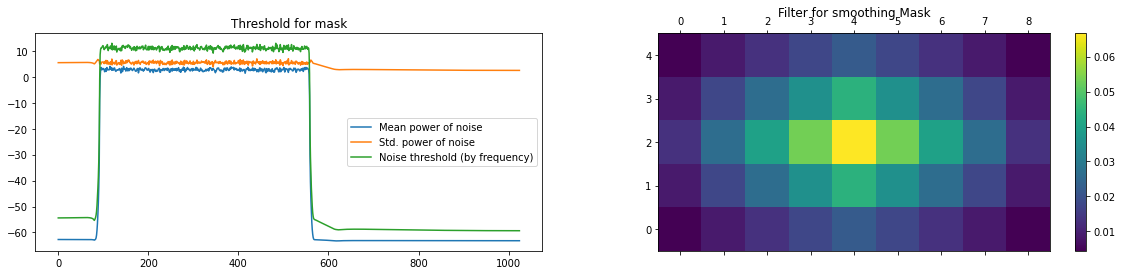

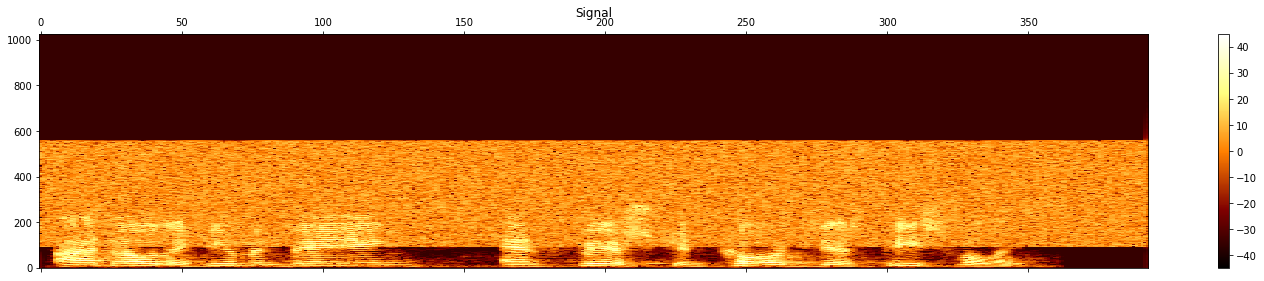

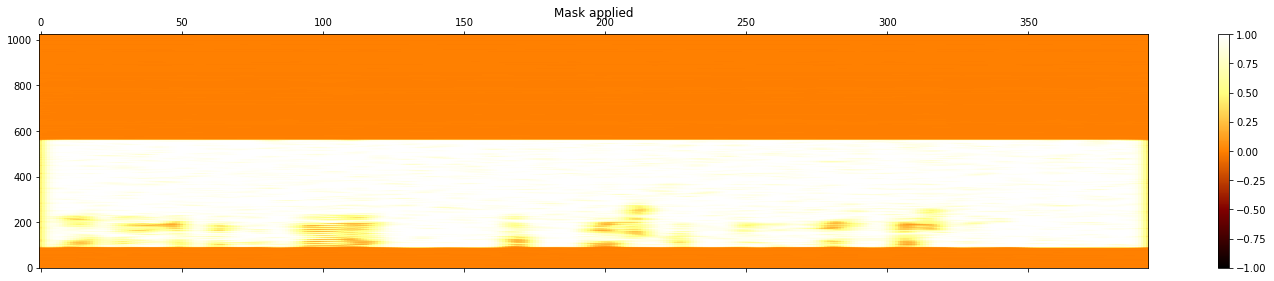

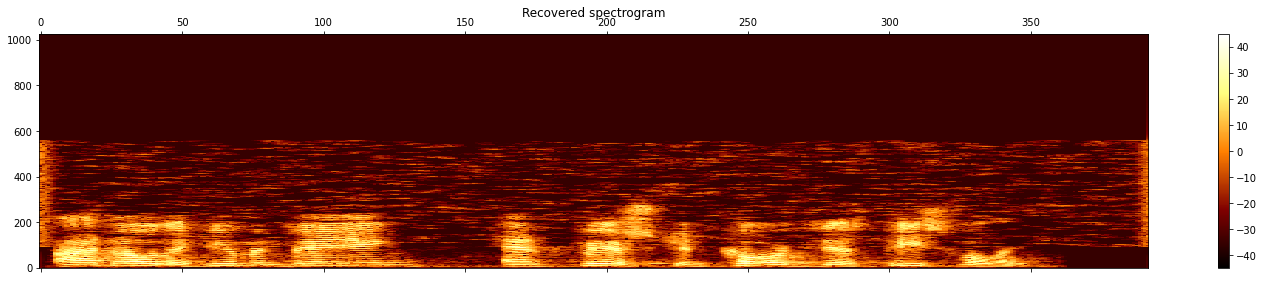

In [0]:
noise_reduced = nr.reduce_noise(audio_clip=audio_clip_band_limited, noise_clip=noise_clip, prop_decrease=1.0, verbose=True)

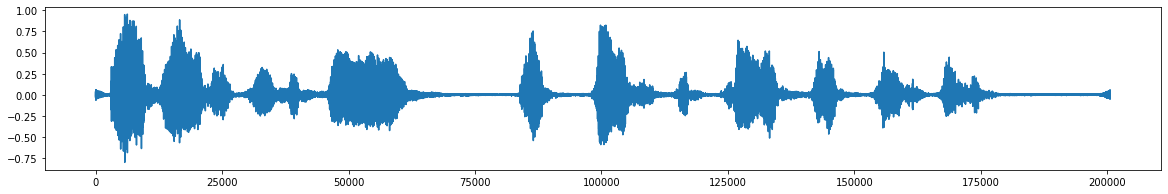

In [0]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(noise_reduced)

In [0]:
IPython.display.Audio(data=noise_reduced, rate=rate)